In [38]:
# from https://github.com/israelst/Algorithms-Book--Python/blob/master/5-Greedy-algorithms/kruskal.py

import time, random, string, itertools

parent = dict()
rank = dict()

def make_set(vertice):
    parent[vertice] = vertice
    rank[vertice] = 0

def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

def kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort()
    times = {}
    for edge in edges:
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            start_time = time.time()
            union(vertice1, vertice2)
            stopped_time = time.time() - start_time
            #print(len(minimum_spanning_tree))
            #print(stopped_time)
            times[len(minimum_spanning_tree)] = stopped_time
            minimum_spanning_tree.add(edge)
    return minimum_spanning_tree, times


def create_graph(no_vertices):
    graph = {
            'vertices': [],
            'edges': set([])
            }
    
    for i in range(no_vertices):
        name_length = 8
        hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
        graph['vertices'].append(hash)
          
    combinations = itertools.combinations(graph['vertices'], 2)
    for combination in combinations:
        graph['edges'].add((random.randint(1,99), combination[0], combination[1]))
        
    return graph


n = 1
while True:
    n = n + 1
    graph = create_graph(2 ** n)
    start_time = time.time()
    minimum_spanning_tree, times = kruskal(graph)
    stopped_time = time.time() - start_time
    print(2 ** n)
    print(stopped_time)



4
0.004272937774658203
8
9.584426879882812e-05
16
0.00024509429931640625
32
0.0009028911590576172
64
0.004483938217163086
128
0.01949000358581543
256
0.08995389938354492
512
0.4012730121612549
1024
1.8062870502471924
2048
8.30609393119812
4096
39.34896683692932


KeyboardInterrupt: 

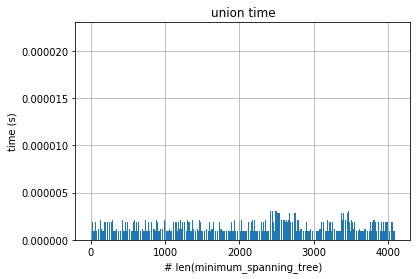

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times.keys()), times.values(), align='center')

plt.xlabel('# len(minimum_spanning_tree)')
plt.ylabel('time (s)')
plt.title('union time')
plt.grid(True)
plt.show()

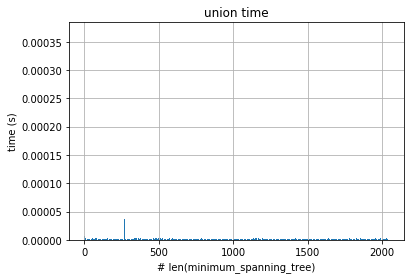